In [1]:
import sys; sys.path.append("..")
from trader.strategies.vol_trend import vol_trend
from trader.backtest.pnl import PnL
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("whitegrid")

In [25]:
#bars = b.get_bars(["BTCUSDT", "ETHUSDT", "ADAUSDT"], pd.to_datetime("2022-04-01"), pd.to_datetime("2022-06-15"), "1d", "SPOT")
bars = pd.read_csv("daily.csv")
print(bars.Symbol.unique())
bars = bars[(bars.Symbol == "BTCUSDT") & (bars.CloseTime >= "2021-01-01")]
prices = bars.set_index("CloseTime").Close
volumes = bars.set_index("CloseTime").QuoteVolume

['BTCUSDT' 'LTCUSDT' 'BCHUSDT' 'XLMUSDT' 'XRPUSDT' 'ETHUSDT' 'SOLUSDT'
 'ALGOUSDT' 'AVAXUSDT' 'ADAUSDT' 'MATICUSDT' 'LINKUSDT' 'UNIUSDT'
 'SUSHIUSDT' 'AAVEUSDT' 'COMPUSDT' 'YFIUSDT' 'FILUSDT' 'MANAUSDT'
 'AXSUSDT' 'DOGEUSDT' 'SHIBUSDT']


In [26]:
best = vol_trend(prices, volumes, 32, 128, 20)
pnl = PnL(best, prices, cash=100.0)

In [27]:
pnl.sharpe

1.5806705879724692

<AxesSubplot:xlabel='CloseTime'>

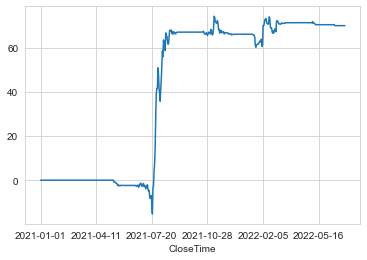

In [28]:
pnl.pnl.cumsum().plot()

<AxesSubplot:xlabel='CloseTime'>

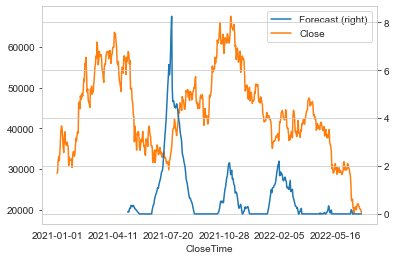

In [31]:
best.to_frame("Forecast").join(prices).plot(secondary_y="Forecast")

<AxesSubplot:xlabel='CloseTime'>

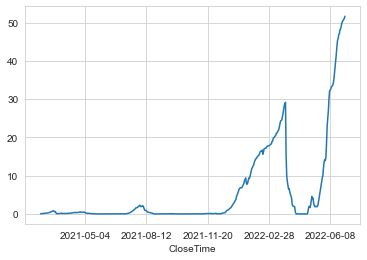

In [7]:
pnl.get_position().plot()

<AxesSubplot:xlabel='CloseTime'>

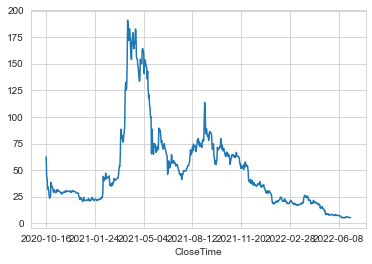

In [8]:
prices.plot()